# FIRST BAND APPROXIMATION (FIRST BAND PROJECTION TO SP LLL)

###### Example: N Particle that restricted to lowest level in a double-well potential

In [1]:
using QuantumOptics
using PyPlot

[7.785756691254985, 7.922554575912651, 14.544347041747969, 15.224233540970168]


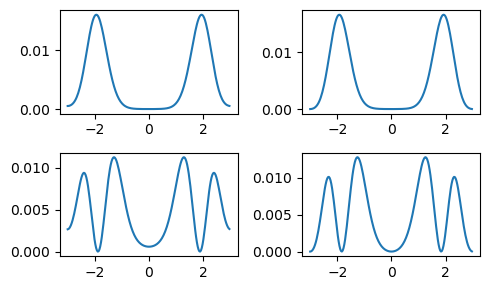

In [2]:
# Parameters for basis
xmin = -3
xmax = 3
Nsteps = 200
L = xmax - xmin

# Parameters for double-well potential
m = 0.5
E0 = 20

# Basis for a particle in real space
b_position = PositionBasis(xmin, xmax, Nsteps)

# Spatial values of real space basis
xpoints = samplepoints(b_position)

# x and p operators
x = position(b_position)
p = momentum(b_position)

# Double-well potential
potential = x -> E0 + x^4 - 8*x^2
V = potentialoperator(b_position, potential)

# Total Hamiltonian
Hkin = p^2/2m
H = Hkin + dense(V)

# Diagonalization and get lowest four eigenvalues
E, states = eigenstates((H + dagger(H))/2, 4)
println(E)

# Plot density
figure(figsize=(5, 3));subplot(2, 2, 1)
plot(xpoints, abs2.(states[1].data));subplot(2, 2, 2)
plot(xpoints, abs2.(states[2].data));subplot(2, 2, 3)
plot(xpoints, abs2.(states[3].data));subplot(2, 2, 4)
plot(xpoints, abs2.(states[4].data));tight_layout()

In [3]:
b_position

Position(xmin=-3, xmax=3, N=200)

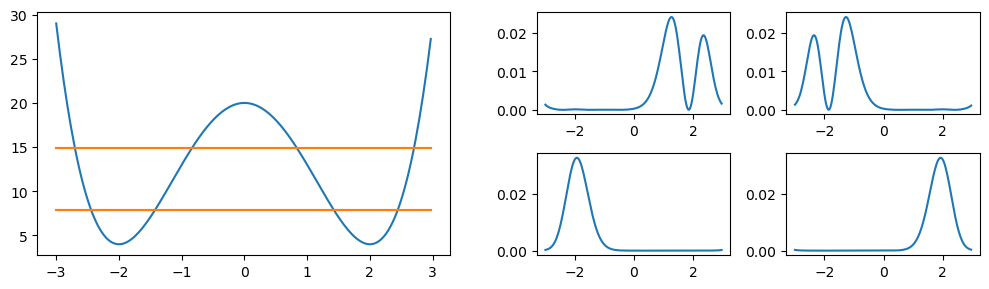

In [4]:
# Create localised states
localizedstates = Ket[(states[1] - states[2])/sqrt(2),
                      (states[1] + states[2])/sqrt(2),
                      (states[3] - states[4])/sqrt(2),
                      (states[3] + states[4])/sqrt(2)]

# Plot double-well potential end its energies
figure(figsize=(10, 3));subplot(1, 2, 1)
plot(xpoints, potential.(xpoints))
for state in localizedstates
    E1 = abs.(expect(H, state))
    plot(xpoints[[1,end]], [E1, E1], "C1")
end

# Plot localised states
subplot(2, 4, 7)
plot(xpoints, abs2.(localizedstates[1].data));subplot(2, 4, 8)
plot(xpoints, abs2.(localizedstates[2].data));subplot(2, 4, 3)
plot(xpoints, abs2.(localizedstates[3].data));subplot(2, 4, 4)
plot(xpoints, abs2.(localizedstates[4].data));tight_layout()

In [5]:
# Create low energy subspace to restrict Hamiltonian into lowest level
b_sub = SubspaceBasis(b_position, localizedstates)
println("dim(subspace): ", length(b_sub))
    
# Project lowest level from main system into subspace
P = projector(b_sub, b_position)
Pt = dagger(P)

# New subspace operators
x_sub = P*x*Pt
Hkin_sub = P*Hkin*Pt
V_sub = P*V*Pt
H_sub = P*H*Pt
println("dim(H_sub): ", length(H_sub.basis_l), "x", length(H_sub.basis_r))

dim(subspace): 4
dim(H_sub): 4x4


In [6]:
b_sub

Subspace(superbasis=Position(xmin=-3, xmax=3, N=200), states:4)

In [9]:
# Not a physical Hamiltonian
dagger(Hkin) == Hkin # SP hermitsel değil
dagger(Hkin_sub) == Hkin_sub # doğal olarak MB hermitsel olmaz
dagger(x_sub) == x_sub 

false

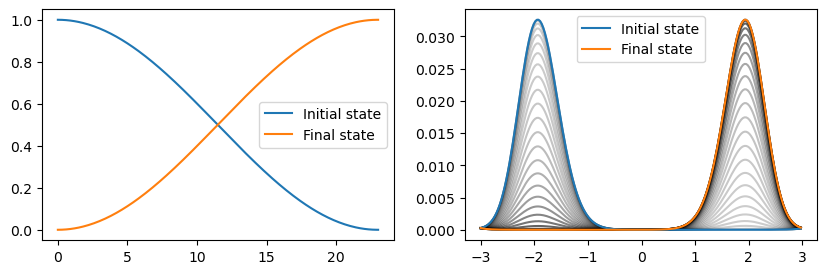

PyObject <matplotlib.legend.Legend object at 0x0000000064B38B80>

In [10]:
# SP Time-evolution in this subspace
T = [0:0.1:23;]

# Initial state
psi0_sub = basisstate(b_sub, 1)

# Time evolution operator
tout, psi_t = timeevolution.schroedinger(T, psi0_sub, H_sub)

# Plot evolution density under the time
figure(figsize=[10, 3])
subplot(1, 2, 1)
plot(tout, [abs2.(psi.data[1]) for psi in psi_t], label="Initial state")
plot(tout, [abs2.(psi.data[2]) for psi in psi_t], label="Final state")
legend()

# Plot particle probablity distribution in the super Hilbert space.
subplot(1, 2, 2)
for i=1:10:length(T)
    plot(xpoints, abs2.((Pt*psi_t[i]).data), "k", alpha=0.6*(T[i]/T[end])^4+0.2)
end
plot(xpoints, abs2.((Pt*psi_t[1]).data), "C0", label="Initial state")
plot(xpoints, abs2.((Pt*psi_t[end]).data), "C1", label="Final state")
legend()

In [11]:
# Fermionic subspace Fock representation
Nparticles = 2

# Create subspace MB
b_mb = ManyBodyBasis(b_sub, bosonstates(b_sub, Nparticles))

# Create subspace MB operator using subspace states
Hkin_mb = manybodyoperator(b_mb, Hkin_sub)
V_mb = manybodyoperator(b_mb, V_sub)
H_mb = manybodyoperator(b_mb, H_sub)

Operator(dim=10x10)
  basis: ManyBody(onebodybasis=Subspace(superbasis=Position(xmin=-3, xmax=3, N=200), states:4), states:10)
     15.7083-3.499e-14im  …          0.0+0.0im
  -0.0967307+8.091e-14im             0.0+0.0im
   3.588e-14-2.49e-15im              0.0+0.0im
 -3.0632e-13+9.444e-14im     -2.2652e-13-1.259e-13im
         0.0+0.0im                   0.0+0.0im
         0.0+0.0im        …          0.0+0.0im
         0.0+0.0im           -7.8128e-13+4.183e-14im
         0.0+0.0im                   0.0+0.0im
         0.0+0.0im             -0.480752-5.469e-14im
         0.0+0.0im               29.7686+1.2361e-13im

In [12]:
# Not a physical Hamiltonian
dagger(H_mb) == H_mb

false

In [38]:
# # To learn particle number in each specific sites (?)    
site_in = 2 # i=1,...,6
n1_mb = number(b_mb)
expect(n1_mb, eigenstates(dense(H_mb))[2][site_in])
n1_mb = number(b_mb, 1)
n2_mb = number(b_mb, 2)
n3_mb = number(b_mb, 3)
n4_mb = number(b_mb, 4)

┌ Warning: The given operator is not hermitian. If this is due to a numerical error make the operator hermitian first by calculating (x+dagger(x))/2 first.
└ @ QuantumOptics C:\Users\Can\.julia\packages\QuantumOptics\4O1HF\src\spectralanalysis.jl:30


Operator(dim=10x10)
  basis: ManyBody(onebodybasis=Subspace(superbasis=Position(xmin=-3, xmax=3, N=200), states:4), states:10)sparse([4, 7, 9, 10], [4, 7, 9, 10], ComplexF64[1.0 + 0.0im, 1.0 + 0.0im, 1.0 + 0.0im, 2.0 + 0.0im], 10, 10)

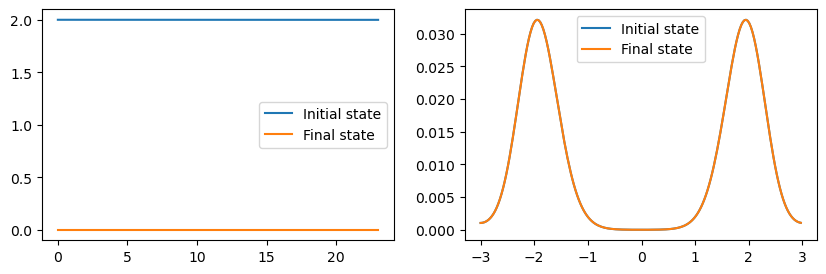

PyObject <matplotlib.legend.Legend object at 0x00000000013B9700>

In [39]:
# MB Time-evolution in this subspace
psi0_mb = basisstate(b_mb, [2, 0, 0, 0])
tout, psi_t_mb = timeevolution.schroedinger(T, psi0_mb, H_mb)

# Calculate particle density 
"""
Sparse operator |x_i><x_i| in position basis.
"""
function nx(b::PositionBasis, i)
    op = SparseOperator(b)
    op.data[i, i] = 1.
    op
end
"""
Probability density in the position basis of the given many body state.
"""
function probabilitydensity_x(state)
    n = Vector{Float64}(undef, length(b_position))
    for i=1:length(b_position)
        nx_i = nx(b_position, i)
        nx_i_sub = P*nx_i*Pt
        nx_i_mb = manybodyoperator(b_mb, nx_i_sub)
        n[i] = real(expect(nx_i_mb, state))
    end
    n
end

# Plot evolution density under the time
figure(figsize=[10, 3])
subplot(1, 2, 1)
plot(tout, real(expect(n1_mb, psi_t_mb)), label="Initial state")
plot(tout, real(expect(n2_mb, psi_t_mb)), label="Final state")
legend()

# Plot particle probablity distribution in the super Hilbert space.
subplot(1, 2, 2)
T_ = tout[tout.<23]
plot(xpoints, real(probabilitydensity_x(psi_t_mb[1])), label="Initial state")
plot(xpoints, real(probabilitydensity_x(psi_t_mb[length(T_)])), label="Final state")
legend()

# Same result with SP

In [45]:
nx_i = nx(b_position, 2)
nx_i_sub = P*nx_i*Pt
nx_i_mb = manybodyoperator(b_mb, nx_i_sub)

dagger(nx_i) == nx_i # true
dagger(P) == P # false
dagger(nx_i_sub) == nx_i_sub # true
dagger(nx_i_mb) == nx_i_mb # true

# ÇIKARIM (kagome): Orada H'Nin hermitsel gelmemesi P operatörü ile alakalı değil! Hamiltonyeni yanlış kurmuşum.
# SORUN SP BASIS'te olabilir!
# ÇIKARIM: States'leri değiştirince bu operatör halâ hermiytsel kalmaya devam ediyor.

true

In [14]:
# Adding coulomb interaction between the particles
using LinearAlgebra

b2_position = b_position ⊗ b_position
x1 = embed(b2_position, 1, x)
x2 = embed(b2_position, 2, x)
r = x1 - x2
d = abs.(diag(r.data)).^-1
d[d.==Inf] .= d[2]
data = sparse(diagm(0 => d))
H_coulomb = SparseOperator(b2_position, b2_position, data)

Operator(dim=40000x40000)
  basis: [Position(xmin=-3, xmax=3, N=200) ⊗ Position(xmin=-3, xmax=3, N=200)]sparse([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  39991, 39992, 39993, 39994, 39995, 39996, 39997, 39998, 39999, 40000], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  39991, 39992, 39993, 39994, 39995, 39996, 39997, 39998, 39999, 40000], [33.33333333333355, 33.33333333333355, 16.666666666666654, 11.111111111111128, 8.333333333333327, 6.6666666666666705, 5.555555555555551, 4.761904761904763, 4.166666666666663, 3.703703703703703  …  3.7037037037037095, 4.166666666666663, 4.761904761904763, 5.555555555555564, 6.666666666666651, 8.333333333333327, 11.111111111111128, 16.666666666666774, 33.33333333333306, 33.33333333333355], 40000, 40000)

In [15]:
dagger(H_coulomb) == H_coulomb

true

In [19]:
# To project this interaction operator into the chosen subspace
H_coulomb_sub = (P⊗P)*H_coulomb*(Pt⊗Pt)

# Mb operator
H_coulomb_mb = manybodyoperator(b_mb, H_coulomb_sub)

# Calculate the lowest eigenstates
H1 = H_mb - H_coulomb_mb
H2 = H_mb + H_coulomb_mb
E_coulomb_attractive, states_coulomb_attractive = eigenstates((H1+dagger(H1))/2)
E_coulomb_repulsive, states_coulomb_repulsive = eigenstates((H2+dagger(H2))/2)

([16.25013476475985, 23.254410290191856, 23.330807558329823, 26.248293185656095, 26.288571073200842, 30.472621000621658, 34.06217076309768, 34.09859594252033, 39.751448752492074, 39.93203741951831], Ket{ManyBodyBasis{Vector{Int64}, SubspaceBasis{Vector{Int64}, PositionBasis{-3, 3, Int64, Int64}, Ket, 0x3e1f7fd358aa1556, UInt64}, 0x9b6aa216a554747f, UInt64}, Vector{ComplexF64}}[Ket(dim=10)
  basis: ManyBody(onebodybasis=Subspace(superbasis=Position(xmin=-3, xmax=3, N=200), states:4), states:10)
  0.01702204133130872 - 9.2709e-13im
   0.9995361963572114 + 1.34635e-12im
 -0.00613414548028486 - 3.24e-15im
  0.01067256239182169 + 1.626e-14im
  0.01706657904514344 - 9.4282e-13im
  0.01059984632791637 + 1.248e-14im
 -0.00625468522330527 - 1.968e-14im
 -0.00443483889507332 + 1.58e-15im
 -0.00194326860010435 - 3.9e-16im
 -0.00446328503387881 - 0.0im, Ket(dim=10)
  basis: ManyBody(onebodybasis=Subspace(superbasis=Position(xmin=-3, xmax=3, N=200), states:4), states:10)
   0.1249719553850494 + 2.6

In [21]:
# How the particle-particle correlation looks
"""
Probability density in the position basis of the given many body state.
"""
function probabilitydensity_x1x2(state, indices)
    P2 = P ⊗ P
    P2t = dagger(P2)
    n = Matrix{Float64}(undef, length(indices), length(indices))
    for i=1:length(indices)
        nx_i_sub = P*nx(b_position, indices[i])*Pt
        for j=1:length(indices)
            nx_j_sub = P*nx(b_position, indices[j])*Pt
            nx_ij_sub = nx_i_sub ⊗ nx_j_sub
            nx_ij_mb = manybodyoperator(b_mb, nx_ij_sub)
            n[i, j] = real(expect(nx_ij_mb, state))
        end
    end
    n
end
println(abs.(E_coulomb_attractive)[1:4])

# Nicer localized states
indices = [1:20:length(b_position);]
n_attractive1 = probabilitydensity_x1x2(states_coulomb_attractive[1] + states_coulomb_attractive[2], indices)
n_attractive2 = probabilitydensity_x1x2(states_coulomb_attractive[1] - states_coulomb_attractive[2], indices)
n_attractive3 = probabilitydensity_x1x2(states_coulomb_attractive[3] + states_coulomb_attractive[4], indices)
n_attractive4 = probabilitydensity_x1x2(states_coulomb_attractive[3] - states_coulomb_attractive[4], indices)

[2.479150152479396, 2.503856434198643, 11.680386858764598, 11.704981056982264]


10×10 Matrix{Float64}:
 1.52816e-6   5.69859e-5   7.0296e-5    …  3.29918e-9  2.53152e-7  1.88789e-8
 5.69859e-5   0.00137894   0.000714745     5.31948e-7  3.75813e-8  2.33732e-6
 7.0296e-5    0.000714745  0.0003297       2.84569e-6  9.76107e-8  2.41784e-6
 3.00166e-6   4.0662e-5    0.00186838      9.72667e-7  1.21958e-7  5.41893e-9
 4.4982e-8    4.0786e-5    0.00034102      8.80865e-8  6.17951e-9  1.93196e-8
 1.66201e-8   3.47513e-6   1.99144e-5   …  5.46554e-8  6.02608e-8  2.89033e-9
 1.24322e-10  6.26076e-10  1.02498e-11     6.37732e-7  1.16767e-6  1.22031e-7
 3.29918e-9   5.31948e-7   2.84569e-6      5.26337e-6  6.31461e-6  1.03388e-7
 2.53152e-7   3.75813e-8   9.76107e-8      6.31461e-6  9.47627e-7  2.69129e-6
 1.88789e-8   2.33732e-6   2.41784e-6      1.03388e-7  2.69129e-6  4.45666e-6

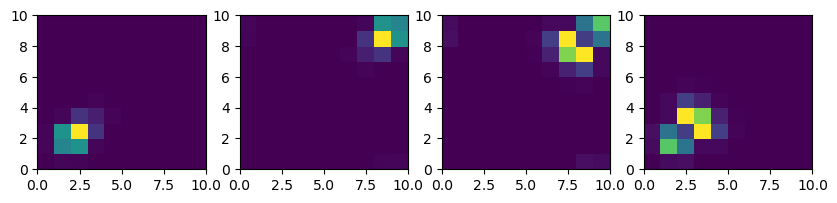

PyObject <matplotlib.collections.PolyCollection object at 0x000000000167DEB0>

In [22]:
# Plot probability of density
figure(figsize=[10,2])
subplot(1, 4, 1)
pcolor(n_attractive1)
subplot(1, 4, 2)
pcolor(n_attractive2)
subplot(1, 4, 3)
pcolor(n_attractive3)
subplot(1, 4, 4)
pcolor(n_attractive4)

[16.25013476475985, 23.254410290191856, 23.330807558329823, 26.248293185656095, 26.288571073200842]


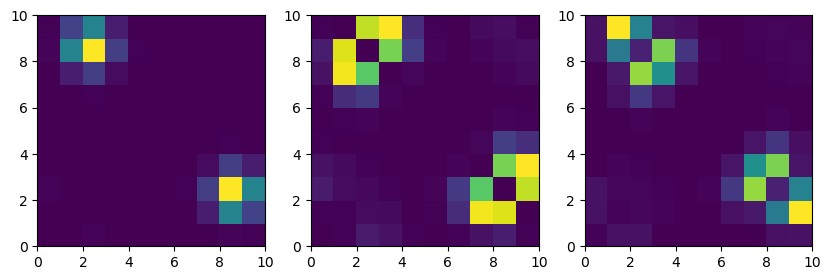

In [23]:
println(abs.(E_coulomb_repulsive)[1:5])
indices = [1:20:length(b_position);]
n_repulsive1 = probabilitydensity_x1x2(states_coulomb_repulsive[1], indices)
n_repulsive2 = probabilitydensity_x1x2(states_coulomb_repulsive[2], indices)
n_repulsive3 = probabilitydensity_x1x2(states_coulomb_repulsive[3], indices)
figure(figsize=[10,3])
subplot(1, 3, 1)
pcolor(n_repulsive1)
subplot(1, 3, 2)
pcolor(n_repulsive2)
subplot(1, 3, 3)
pcolor(n_repulsive3)